<a href="https://colab.research.google.com/github/Brabyns/Blog/blob/main/Election_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("votes.csv")
df.head()

,State,Users,VEP(#)
0,Arizona,5692,5188000
1,Florida,16921,15551739
2,Georgia,5841,7550147
3,Michigan,8411,7550147
4,Minnesota,4596,4118462


Text(0, 0.5, 'VEP(#)')

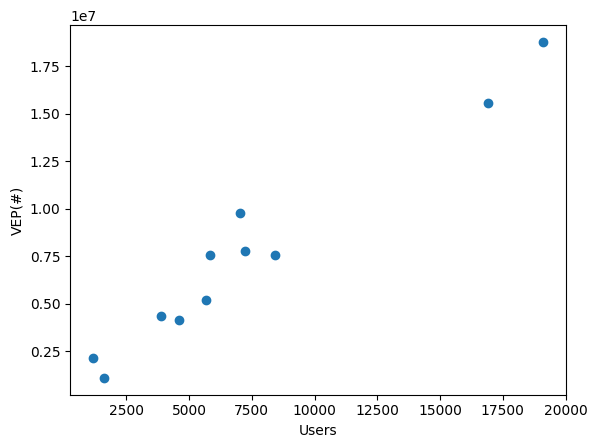

In [6]:
plt.scatter(df.Users,df['VEP(#)'])
plt.xlabel('Users')
plt.ylabel('VEP(#)')


In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Users', 'VEP(#)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2], dtype=int32)

In [8]:
df['cluster']=y_predicted
df.head()

,State,Users,VEP(#),cluster
0,Arizona,5692,5188000,2
1,Florida,16921,15551739,1
2,Georgia,5841,7550147,0
3,Michigan,8411,7550147,0
4,Minnesota,4596,4118462,2


In [9]:
km.cluster_centers_

array([[7.13425000e+03, 8.16033025e+06],
       [1.80200000e+04, 1.71680095e+07],
       [3.39040000e+03, 3.38166820e+06]])

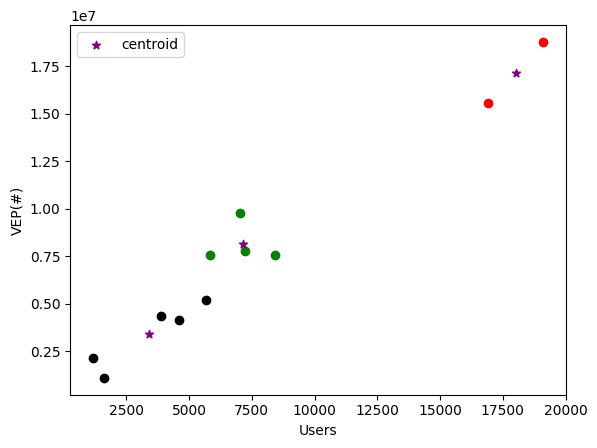

In [11]:
df1  = df[df.cluster==0]
df2  = df[df.cluster==1]
df3  = df[df.cluster==2]
plt.scatter(df1.Users,df1['VEP(#)'],color='green')
plt.scatter(df2.Users,df2['VEP(#)'],color='red')
plt.scatter(df3.Users,df3['VEP(#)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Users')
plt.ylabel('VEP(#)')
plt.legend()

In [12]:
scaler = MinMaxScaler()
scaler.fit(df[['VEP(#)']])
df['VEP(#)'] = scaler.transform(df[['VEP(#)']])

scaler.fit(df[['Users']])
df['Users'] = scaler.transform(df[['Users']])

df.head()

,State,Users,VEP(#),cluster
0,Arizona,0.252519,0.232059,2
1,Florida,0.877637,0.817421,1
2,Georgia,0.260814,0.365477,0
3,Michigan,0.403886,0.365477,0
4,Minnesota,0.191505,0.171650,2


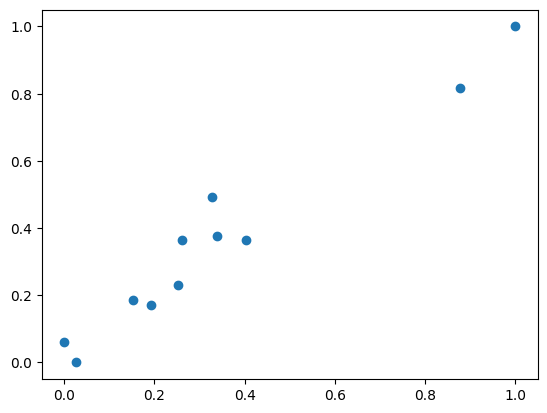

In [14]:
plt.scatter(df.Users,df['VEP(#)'])

In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Users', 'VEP(#)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2], dtype=int32)

In [16]:
df['cluster']=y_predicted
df.head()

,State,Users,VEP(#),cluster
0,Arizona,0.252519,0.232059,0
1,Florida,0.877637,0.817421,1
2,Georgia,0.260814,0.365477,0
3,Michigan,0.403886,0.365477,0
4,Minnesota,0.191505,0.171650,2


In [17]:
km.cluster_centers_

array([[0.3167511 , 0.36636468],
       [0.93881868, 0.90871028],
       [0.09235651, 0.10452795]])

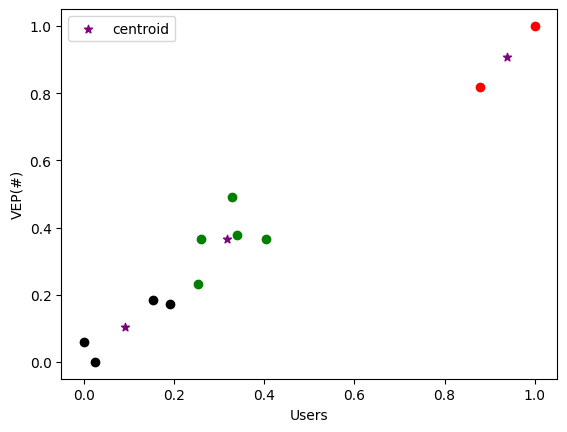

In [18]:
df1  = df[df.cluster==0]
df2  = df[df.cluster==1]
df3  = df[df.cluster==2]
plt.scatter(df1.Users,df1['VEP(#)'],color='green')
plt.scatter(df2.Users,df2['VEP(#)'],color='red')
plt.scatter(df3.Users,df3['VEP(#)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Users')
plt.ylabel('VEP(#)')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Users','VEP(#)']])
  sse.append(km.inertia_)

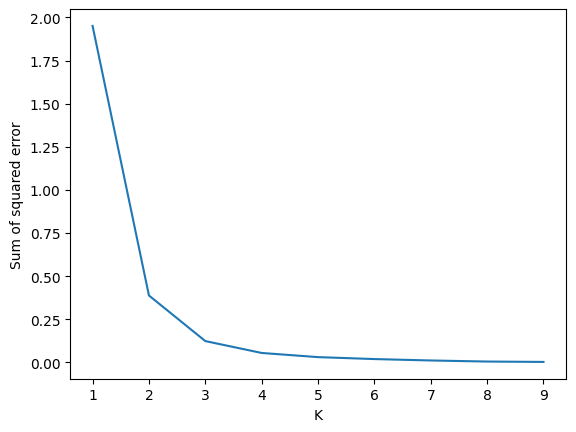

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [22]:
km.cluster_centers_


array([[0.17207593, 0.17871164],
       [0.87763737, 0.81742055],
       [0.40388577, 0.36547694],
       [0.01263709, 0.03034426],
       [1.        , 1.        ],
       [0.32756221, 0.49153446],
       [0.2608139 , 0.36547694],
       [0.25251907, 0.23205884],
       [0.33897456, 0.3772762 ]])

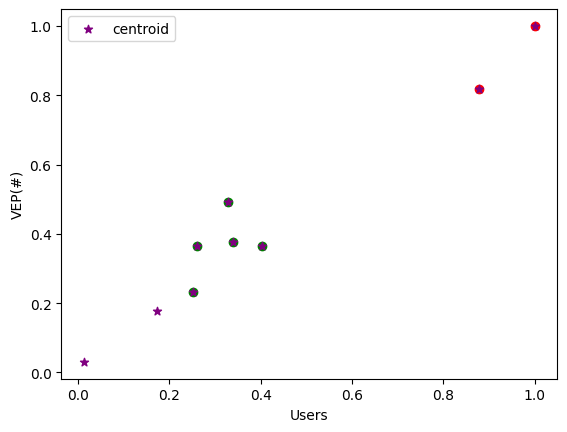

In [23]:
df1  = df[df.cluster==0]
df2  = df[df.cluster==1]
plt.scatter(df1.Users,df1['VEP(#)'],color='green')
plt.scatter(df2.Users,df2['VEP(#)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Users')
plt.ylabel('VEP(#)')
plt.legend()